Use Case

Objective Statement: Get business insight about whether stroke will occure or not.
                        To reduce risk in deciding to whom a stroke occur.
                        To increase predicting efficiency by using different features of a person like age, gender, history of work and other medical conditions.

Challenges: Large size of data, can not maintain by excel spreadsheet.
            Need several conditions to check at a same time.

Methodology / Analytic Technique: Descriptive analysis & Graph analysis

Business Benefit: Helping Business Development Team to create predictions based on the characteristic for each patient.
Know how to treat customer with specific medical condition.

Expected Outcome: Know how many  patients are in risk of a stroke.

Business Understanding: 
Why it is important to learn about stroke?
Stroke is the second leading cause of death and disability worldwide. According to the WHO, 5 million people worldwide suffer a stroke every year. 
In the USA, someone has a stroke every 40 seconds and every 4 minutes, someone dies. The aftermath is devastating, with victims experiencing a wide range of disabling symptoms. 
The economic burden to the healthcare system in the US amounts to about $34 billion per year in the US. 
Who is affected?
While there is no one, absolute risk factor for determining one’s chances of having a stroke, certain characteristics and factors may increase a person’s odds. 
It is estimated that 60 to 80% of strokes could be prevented through healthy lifestyle changes. 
The dataset will help to examine a multitude of variables to better understand which, if any, play a significant role in predicting the odds of having a stroke.
Why do we care?
Understanding one’s risk factors could help motivate an individual to better educate themselves on their chances of having a stroke, 
more closely monitor their health, make healthier choices, and ultimately decrease their overall risk of stroke. 

Data Understanding:
Data Set: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
Date Created: 01/26/2021
The dataset has 12 columns and 5,110 rows.

Data preparation:
Python Version: 3.7.6
Packages: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and imblearn

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv') #Reading csv file
data.head() # Displaying top 5 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Exploratory Data Analysis

In [3]:
data.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe() # Showing data's statistical features

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#ID is nothing but a unique number assigned to every patient to keep track of them and making them unique. So, dropping it.
data.drop("id",inplace=True,axis=1)

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

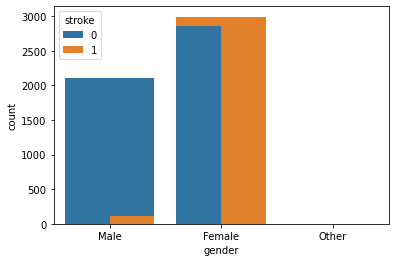

In [6]:
#Gender of the paitents
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())
# Above codes will give us gender's unique values and count of each value.

sns.countplot(data=data,x='gender') #This will help us to see count of values in each unique category.
sns.countplot(data=data,x='gender',hue='stroke')# This plot will help to analyze how gender will affect chances of stroke.

<AxesSubplot:xlabel='age', ylabel='count'>

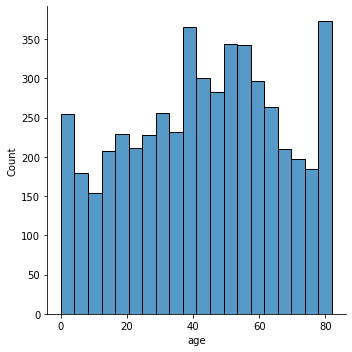

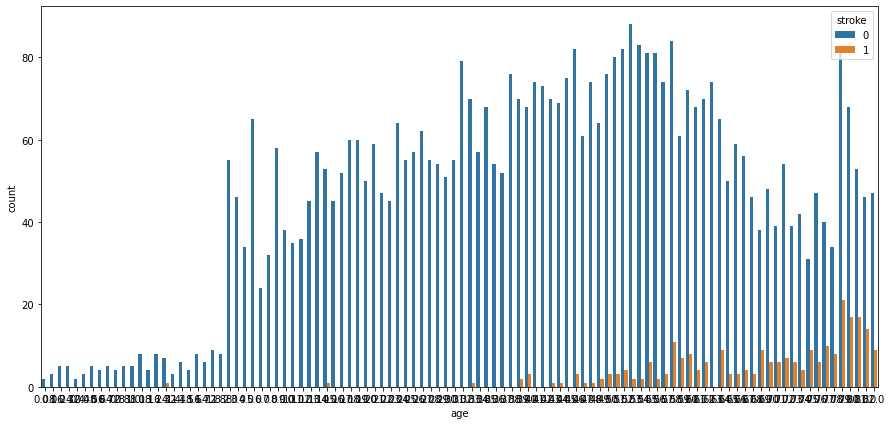

In [7]:
#Age
data['age'].nunique() # Returns number of unique values 
sns.displot(data['age']) # This will plot a distribution plot of variable age
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='age',hue='stroke') # This plot will help to analyze how gender will affect chances of stroke.

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

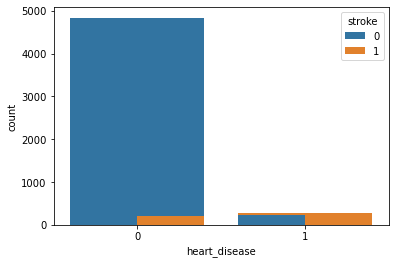

In [8]:
#Previous heart diseases
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())
# Above code will gives us unique value for heart disease and its value counts
sns.countplot(data=data,x='heart_disease') # Will plot a counter plot of variable heart diseases
sns.countplot(data=data,x='heart_disease',hue='stroke') # This plot will help to analyze how gender will affect chances of stroke.

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

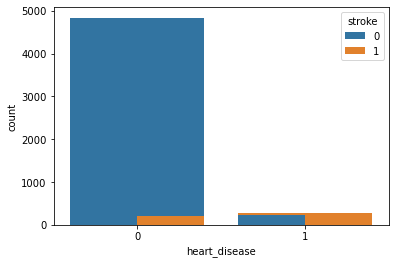

In [9]:
#Hypertensive paitents
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())
# Above code will gives us unique value for heart disease and its value counts
sns.countplot(data=data,x='heart_disease') # Will plot a counter plot of variable heart diseases
sns.countplot(data=data,x='heart_disease',hue='stroke') # This plot will help to analyze how gender will affect chances of stroke.

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


<AxesSubplot:xlabel='ever_married', ylabel='count'>

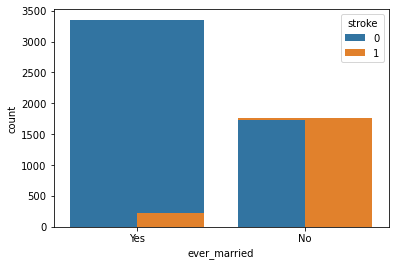

In [10]:
#Ever married in life 
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())
# Above code will gives us number unique values of ever-married patients and its value count
sns.countplot(data=data,x='ever_married') # Counter plot of ever married 
sns.countplot(data=data,x='ever_married',hue='stroke') # Ever married with respect of stroke

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<AxesSubplot:xlabel='work_type', ylabel='count'>

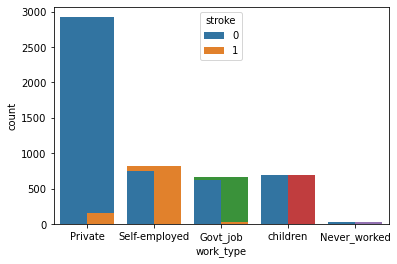

In [11]:
#Work type of patients
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())
# Above code will gives us unique values of work type and its value count
sns.countplot(data=data,x='work_type') # Counter plot of work type
sns.countplot(data=data,x='work_type',hue='stroke') # Count plot of work type with respect to stroke

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

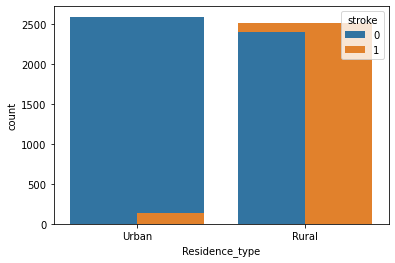

In [12]:
#Residence type of paitents
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())
# Above code will gives us unique values of Residence type and its count
sns.countplot(data=data,x='Residence_type') # Counter plot of residence type
sns.countplot(data=data,x='Residence_type',hue='stroke') # Residence Type with respect to stroke

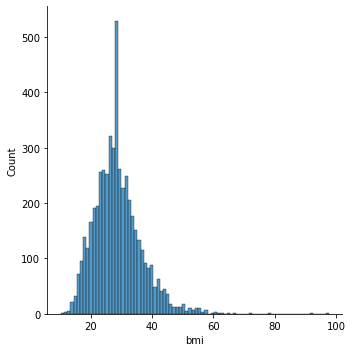

In [13]:
#Body mass index - BMI
data['bmi'].isna().sum() #Gives us the null values
data['bmi'].fillna(data['bmi'].mean(),inplace=True) # Filling null values with average value
data['bmi'].nunique() # Gives us the number of unique values 
sns.displot(data['bmi']) # Distribution of bmi

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

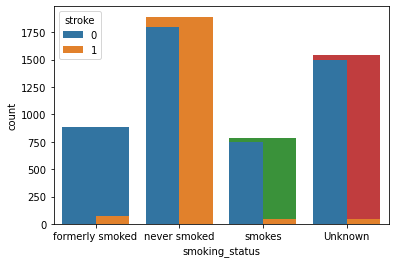

In [14]:
#Smoking status of patients
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())
# Gives us the unique values and its count
sns.countplot(data=data,x='smoking_status') # Count plot of smoking status
sns.countplot(data=data,x='smoking_status',hue='stroke') # Smoking Status with respect to Stroke

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

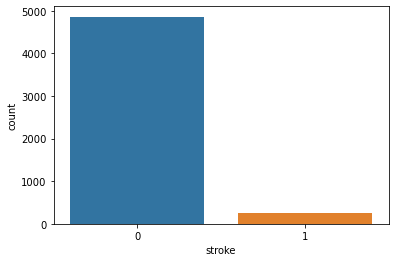

In [15]:
#Stroke - Our target variable. It tells us whether patients have chances of stroke.
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())
# Gives us the unique Value and its count
sns.countplot(data=data,x='stroke') # Count Plot of Stroke

Feature Engineering

In [16]:
# Feteching columns whose data type is object.
cols=data.select_dtypes(include=['object']).columns
print(cols)
le=LabelEncoder() # Initializing our Label Encoder object
data[cols]=data[cols].apply(le.fit_transform) # Transfering categorical data into numeric
print(data.head())

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


<AxesSubplot:>

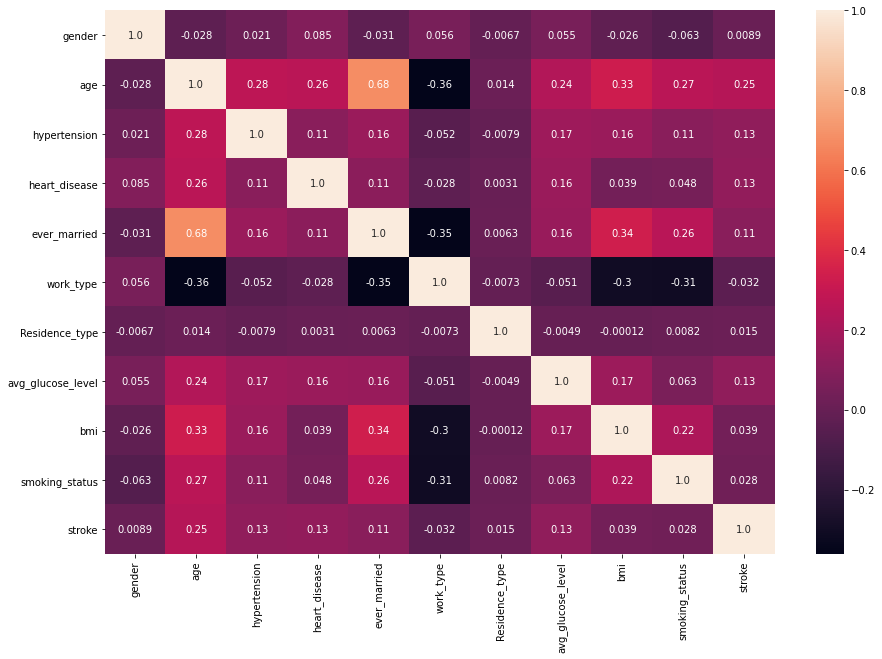

In [17]:
#Plotting heat map for checking correlation 
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')
#We can see that age, hypertension, heart_disease, ever_married, avg_glucose_level have effective correlation

In [18]:
#To cross check we will use - SelectKBest - used for extracting best features of given dataset
#f_classif - Compute the ANOVA F-value for the provided sample.
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In [19]:
#We can see that age is having highest values so, we can keep threshold of 50
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


In [20]:
#Defining independent and dependent variables
X = data[cols]
y = data['stroke']

In [21]:
# standard scalar transforms the data in such a manner that it has mean as 0 and standard deviation as 1
sc = StandardScaler()

In [22]:
X = sc.fit_transform(X)

In [23]:
#CHecking values of 0 and 1 in dataset
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))
#creating new samples using existing one with help of smote function
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y.ravel())
#checking values of X and y in dataset after oversampling 
print('After OverSampling, the shape of X: {}'.format(X.shape))
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of X: (9722, 5)
After OverSampling, the shape of y: (9722,) 

After OverSampling, counts of label '1': 4861
After OverSampling, counts of label '0': 4861


Modelling

In [24]:
#Splitting data in train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50,test_size=0.20)

Model 1 - Logistic Regression

In [25]:
#Calling logistic function 
lr = LogisticRegression()
lr.fit(X_train, y_train) #fitting and training the model with traning values

LogisticRegression()

In [26]:
#Creating y_pred variable as model is predicting values with help of X-test data 
y_pred = lr.predict(X_test)

Evaluation of Model 1 - Logistic Regression

In [27]:
#Calling confusion matrix function because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[719 276]
 [175 775]]


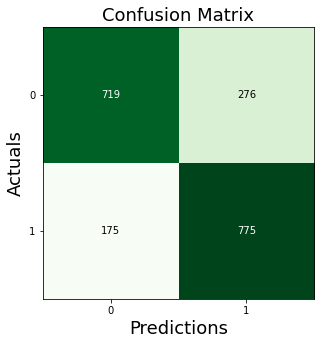

In [28]:
#Plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
#Creating a variable and assigning the accuracy score values with help of y_test and y_pred 
#Accuracy classification score - This function computes subset accuracy the y predicted for a sample must exactly match with the y_actual
logreg=accuracy_score(y_test,y_pred) 
logreg

0.7681233933161954

In [30]:
#Printing roc and auc scores
#OC is a probability curve and AUC represents the degree/measure of separability
roc_auc_score(y_test, y_pred)

0.7692012695054218

In [31]:
#Classification report- Build a text report showing the main classification metrics.
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       995
           1       0.74      0.82      0.77       950

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



Model 2 - Decision Tree Classifier

In [32]:
#Calling decision tree classifier 
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, y_train) #fitting and training the model with traning values
dt_pred_train = dt.predict(X_train)

Evaluation of Model 2 - Decision Tree Classifier

In [33]:
#Printing evaluation score usinf f-test for training data
print('Training Set Evaluation F1-Score=> ', f1_score(y_train, dt_pred_train))

Training Set Evaluation F1-Score=>  1.0


In [34]:
dt_pred_test = dt.predict(X_test)
#Printing evaluation score usinf f-test for test data
print('Testing Set Evaluation F1-Score=> ', f1_score(y_test, dt_pred_test))

Testing Set Evaluation F1-Score=>  0.9150599270453361


Model 3 - Random Forest Classifier 

In [35]:
#Building Random Forest Classifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

Evaluation of Model 3 - Random Forest Classifier 

In [36]:
#Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1_score=> ', f1_score(y_train, rfc_pred_train))

Training Set Evaluation F1_score=>  1.0


In [37]:
rfc_pred_test = rfc.predict(X_test)
#Printing evaluation score usinf f-test for test data
print('Testing Set Evaluation F1-Score=> ', f1_score(y_test, rfc_pred_test))

Testing Set Evaluation F1-Score=>  0.8925449871465294


Model 4 - Extreme Gradient Boosting 

In [38]:
#Building Xgboost Classifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

[16:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\srusti\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Evaluation of Model 4 - Extreme Gradient Boosting 

In [39]:
#Evaluating on Training set
print('Training Score: {}'.format(xgb_model.score(X_train, y_train))) 

Training Score: 0.9741545583129742


In [40]:
#Evaluating on test set
print('Test Score: {}'.format(xgb_model.score(X_test, y_test)))

Test Score: 0.9485861182519281


In [41]:
y_pred = xgb_model.predict(X_test)

In [42]:
#Printing accuracy scores for xgboost
logreg=accuracy_score(y_test,y_pred) 
logreg

0.9485861182519281

In [43]:
#Printing roc and auc scores for xgboost
roc_auc_score(y_test, y_pred)

0.9484871727056334

In [44]:
#Classification report for xgboost
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       995
           1       0.95      0.94      0.95       950

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



## Conclusion

As per the above models we can say, that the model 4 - Extreme Gradient Boosting has the highest accuracy for both training and test data set.
And the evaluation score is similar for train and test data.
So, we can use the same model for our predictions.